In [49]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [51]:
import numpy as np
# import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalMaxPooling2D, ConvLSTM2D, Reshape, TimeDistributed, Activation, LSTM
from tensorflow.keras.optimizers import RMSprop
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder
from scipy.io import loadmat
from tensorflow.keras.callbacks import ReduceLROnPlateau


from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt

In [52]:
def plotsave(history):
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validaton'], loc='upper left')

In [53]:
dir_ds = "./MFPT_DS_ENV1.mat"
data = loadmat(dir_ds) # loading the data into dictionary format
locals().update(data)
print(data.keys())


dict_keys(['__header__', '__version__', '__globals__', 'DL', 'DS'])


In [54]:
signalData = data['DS']
U_L = data['DL']
T_L = data['DL']
# Normalize the data
# signalData = signalData / 255.0
signalData = np.reshape(signalData, (len(signalData), 32, len(np.transpose(signalData)),1))
# p_signalData = np.zeros((signalData.shape[0],p,p,1)) 
signalData.shape

(858, 32, 32, 1)

In [55]:
label_encoder  = LabelBinarizer()
U_L  = label_encoder.fit_transform(U_L)
T_L  = label_encoder.fit_transform(T_L)

In [56]:
random_seed = 2
'DATA SPLITING FOR validation'
X_train, X_val, Y_train, Y_val = train_test_split(signalData, T_L, test_size = 0.3, stratify=T_L, random_state=random_seed)
print(X_train.shape, Y_train.shape)

(600, 32, 32, 1) (600, 1)


In [57]:
T_L.shape

(858, 1)

In [58]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (32,32,1)))

#tanh, elu
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
tf.keras.layers.GlobalMaxPooling2D(data_format='channels_last')
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.5))

# dense layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

# output layer
model.add(Dense(1, activation='sigmoid'))
# model.add(Dense(1, activation='sigmoid'))

optimizer = RMSprop(learning_rate=0.0001, rho=0.9, epsilon=1e-08, decay=0.0) # <<
# Compile the model

In [59]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        832       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 8, 8, 64)         

In [60]:
import tensorflow as tf

model.compile(optimizer = optimizer , loss = tf.keras.losses.BinaryCrossentropy(), metrics=["accuracy"])

In [61]:
epochs = 20 #<<100
batch_size = 32 # <<

In [62]:
# history = model.fit(train, T_L, batch_size = batch_size, epochs = epochs, 
#           validation_data = (test, test_label), verbose = 1)
history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, validation_data = (X_val, Y_val), verbose = 1)

Epoch 1/20
19/19 [==============================] - 1s 36ms/step - loss: 0.6324 - accuracy: 0.5100 - val_loss: 0.5722 - val_accuracy: 0.5000
Epoch 2/20
19/19 [==============================] - 1s 30ms/step - loss: 0.5794 - accuracy: 0.5133 - val_loss: 0.4968 - val_accuracy: 0.5000
Epoch 3/20
19/19 [==============================] - 1s 31ms/step - loss: 0.4869 - accuracy: 0.5800 - val_loss: 0.3711 - val_accuracy: 1.0000
Epoch 4/20
19/19 [==============================] - 1s 30ms/step - loss: 0.3309 - accuracy: 0.8950 - val_loss: 0.1813 - val_accuracy: 1.0000
Epoch 5/20
19/19 [==============================] - 1s 31ms/step - loss: 0.1246 - accuracy: 0.9967 - val_loss: 0.0361 - val_accuracy: 1.0000
Epoch 6/20
19/19 [==============================] - 1s 30ms/step - loss: 0.0240 - accuracy: 1.0000 - val_loss: 0.0059 - val_accuracy: 1.0000
Epoch 7/20
19/19 [==============================] - 1s 31ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 8/20
19

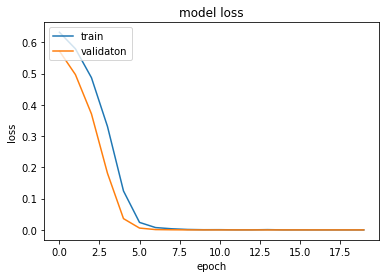

In [63]:
plotsave(history)

In [64]:
model.save("../env02/env1sv/")

INFO:tensorflow:Assets written to: ../env02/env1sv/assets
